# Поиск реального поведения газа Ван-дер-Ваальса

Импортируем numpy и зададим относительную температуру

In [1]:
import numpy as np

tau = 0.87

Введём функцию поиска давления, а так же перономирующую её на отрезок -1,1 с произвольного

In [2]:
def pi(fi):
    return -3 / (fi**2) + (8 * tau / 3)/(fi - 1/3)

def pi_norm(f, a, b, fi):
    return pi(((b - a) / 2) * (fi + 1 + 2*a / (b - a))) * (b - a) / 2

Введём функцию, считающую Гауссом-Лежандром интеграл по двум точкам

In [3]:
def integr(f, a, b, x):
    return pi_norm(f, a, b, -1/np.sqrt(3)) + pi_norm(f, a, b, 1/np.sqrt(3))

Введём функцию поиска корней нашего уравнения как собственных значений сопровождающей матрицы

In [4]:
def sol(pi):
    x = np.zeros((3,3), dtype = float)
    x[1,0] = x[2,1] = 1
    x[0,2] = 1/pi
    x[1,2] = -3/pi
    x[2,2] = 1/3 + 8/3 * tau/pi
    roots, vectors = np.linalg.eig(x)
    return(roots)    

Введём функцию поиска значения, приравнивающего значения двух интегралов

In [5]:
def search(pi1 = 0, pi2 = 1, atol = 1e-4):
    razn = 1000
    while ((np.abs (razn) > atol) or np.imag(razn)!= 0):
        pi = (pi1 + pi2) / 2
        roots = sol(pi)
        a = np.amin(roots)
        b = np.amax(roots)
        razn = integr(pi, a, b, pi) - (b - a) * pi
        if (razn < 0) or np.any(np.imag(roots) != 0):
            pi2 = pi
        else:
            pi1 = pi
    return pi

Порисуем

0.55963134765625


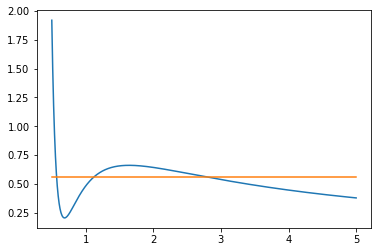

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(0.5, 5, 1000)
y = pi(x)
y1 = np.zeros(1000)
pi0 = search()
y1 += pi0
print(pi0)
plt.plot(x,y)
plt.plot(x, y1)
plt.show()